In [1]:
import numpy as np
import matplotlib.pyplot as plt
import illustrisAPI.iApi as iApi
iApi.headers['api-key']='cc4ff6392e79c9e08c158e5ae5493718'

In [2]:
iApi.setUnits('Zephyr')

In [3]:
masses=iApi.getSubhaloField('SubhaloMassType',simulation='Illustris-1')

In [4]:
simInfo=iApi.getSimData(simulation='Illustris-1')
boxSize=1000*simInfo['BoxSize']/simInfo['h']
volume=boxSize**3

In [5]:
snapInfo=iApi.getSnapData(simulation='Illustris-1')

In [6]:
mStar=1e6*snapInfo['NumPartStar']
rhoStar=mStar/volume
print(rhoStar)

5.01919504760861e-10


In [7]:
mGas=masses[:,0]
mDm=masses[:,1]
mStar=masses[:,4]
mBh=masses[:,5]

In [8]:
nBins=48
ms=np.zeros(nBins)
dGas=np.zeros(nBins)
dStar=np.zeros(nBins)
dBh=np.zeros(nBins)
dDm=np.zeros(nBins)
for i in range(nBins):
    mLow=10**(6+0.25*i)
    mHigh=10**(6+0.25*(i+1))
    dm=mHigh-mLow
    ms[i]=10**(6+0.25*(i+0.5))
    gas=np.argwhere((mGas>mLow) & (mGas<mHigh))
    stars=np.argwhere((mStar>mLow) & (mStar<mHigh))
    bhs=np.argwhere((mBh>mLow) & (mBh<mHigh))
    dms=np.argwhere((mDm>mLow) & (mDm<mHigh))
    dGas[i]=np.size(gas)/(volume*dm)
    dStar[i]=np.size(stars)/(volume*dm)
    dBh[i]=np.size(bhs)/(volume*dm)
    dDm[i]=np.size(dms)/(volume*dm)

In [33]:
#smbhData=np.genfromtxt('data/SMBHs.txt')
#smbhData[:,1]=smbhData[:,1]*1e-9

In [35]:
#np.savetxt('data/SMBHs.txt',smbhData,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)')

In [15]:
gasData=np.vstack((ms[np.argmax(dGas):-5],dGas[np.argmax(dGas):-5])).T
gasFooter='/Illustris (gas)/#D62839/-/'
starData=np.vstack((ms[np.argmax(dStar):],dStar[np.argmax(dStar):])).T
starFooter='/Illustris (stars)/#FE9920/--/'
dmData=np.vstack((ms[np.argmax(dDm):],dDm[np.argmax(dDm):])).T
dmFooter='/Illustris (DM)/#011638/-/'
bhData=np.vstack((ms[np.argmax(dBh):],dBh[np.argmax(dBh):])).T #almost identical to individual SMBHs...
bhFooter='/Illustris (BH total)/#55286F/--/'
np.savetxt('data/galaxiesGas.txt',gasData,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)',footer=gasFooter)
np.savetxt('data/galaxiesStars.txt',starData,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)',footer=starFooter)
np.savetxt('data/galaxiesBHs.txt',bhData,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)',footer=bhFooter)
np.savetxt('data/galaxiesDM.txt',dmData,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)',footer=dmFooter)

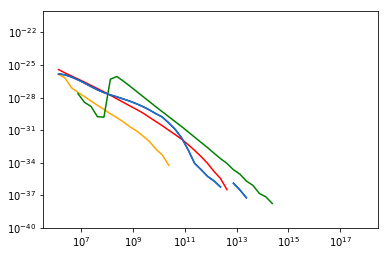

In [12]:
plot=plt.gca()
plot.plot(ms,dStar,c='r')
plot.plot(ms,dBh,c='orange')
plot.plot(ms,dDm,c='g')
plot.plot(ms,dGas,c='b')
plt.plot(ms[:-5],dGas[:-5])
plot.set_xscale('log')
plot.set_yscale('log')
plot.set_ylim(1e-40,1e-20)
plt.show()